# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct statistical tests on a real-world dataset

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [1]:
#Your code here
import pandas as pd
data = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1', dtype='object')

In [2]:
data.describe()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
count,26289,19759,19550,19862,1306,1320,16352,3044,14994,14670,...,3414,3411,3394,3424,3409,3401,3410,3424,4499,4343
unique,59,78,101,20,17,15,29,25,32,16,...,3,3,3,3,3,3,3,3,83,1628
top,Male,United States,37.0,Employed full-time,Yes,"Yes, I'm focused on learning mostly data scien...",Yes,Yes,Data Scientist,Fine,...,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,1.0,100000.0
freq,16737,6128,2315,12093,981,800,13280,2126,3629,9432,...,1518,1918,1666,1509,1724,1769,1662,1503,1570,60


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

In [3]:
#Your code here
#null hypothesis = mean salary of masters is equal than mean salary of bachelors
#alternative hypothesis = mean salary of masters is higher than mean salary of bachelors
#this is a one tailed test (alternative = larger)

In [4]:
import numpy as np

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [6]:
bach_salary = data.AdjustedCompensation.loc[data["FormalEducation"] == "Bachelor's degree"]
bach_salary = bach_salary.astype('float64')
bach_salary = bach_salary.dropna()
n_bach = len(bach_salary)
print(f'There are a total of {n_bach} data entries')
mean_bach = round(bach_salary.sum()/(len(bach_salary) - (bach_salary.isnull().sum())), 2)
print(f'The mean salary for bachelors is {mean_bach}')
std_bach = round(np.std(bach_salary),2)
print(f'The standard deviation for salary for bachelors is {std_bach}')

There are a total of 1107 data entries
The mean salary for bachelors is 64887.1
The standard deviation for salary for bachelors is 306797.21


In [7]:
master_salary = data.AdjustedCompensation.loc[data["FormalEducation"] == "Master's degree"]
master_salary = master_salary.astype('float64')
master_salary = master_salary.dropna()
n_master = len(master_salary)
print(f'There are a total of {n_master} data entries')
mean_master = round(master_salary.sum()/(len(master_salary) - (master_salary.isnull().sum())), 2)
print(f'The mean salary for bachelors is {mean_master}')
std_master = round(np.std(master_salary),2)
print(f'The standard deviation for salary for bachelors is {std_master}')

There are a total of 1990 data entries
The mean salary for bachelors is 69139.9
The standard deviation for salary for bachelors is 135493.15


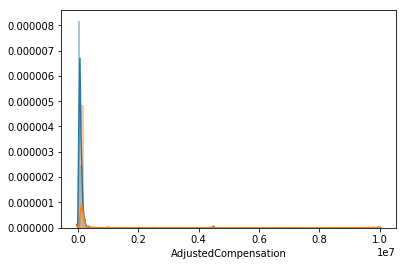

In [8]:
sns.distplot(master_salary)
sns.distplot(bach_salary)

In [9]:
import scipy.stats as stats
from scipy.stats import ttest_ind, ttest_ind_from_stats

In [10]:
t, p = ttest_ind(bach_salary, master_salary, equal_var=False, nan_policy='omit')
print(f" ttest_ind: t = {t},  p = {p/2}")

 ttest_ind: t = -0.4378669333541159,  p = 0.3307763945127241


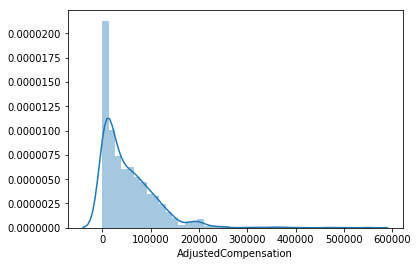

In [11]:
bach_salary = bach_salary.loc[(stats.zscore(bach_salary.values)) < 3]
sns.distplot(bach_salary)

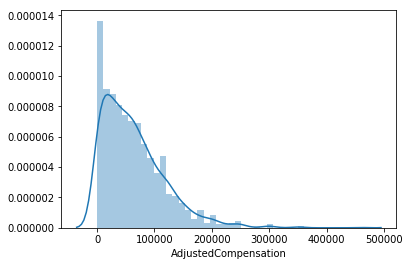

In [12]:
master_salary = master_salary.loc[(stats.zscore(master_salary.values)) < 3]
sns.distplot(master_salary)

In [13]:
t2, p2 = ttest_ind(bach_salary, master_salary, equal_var=False)
print(f" ttest_ind: t = {t2},  p = {p2/2}")

 ttest_ind: t = -4.526086727760483,  p = 3.165514706517899e-06


In [14]:
bach = bach_salary.values
master = master_salary.values

In [15]:
bachbar = bach.mean()
bachvar = bach.var(ddof=1)
n_bach = bach.size
adof = n_bach - 1

masterbar = master.mean()
mastervar = master.var(ddof=1)
n_master = master.size
bdof = n_master - 1

# Use scipy.stats.ttest_ind_from_stats.
t2, p2 = ttest_ind_from_stats(bachbar, np.sqrt(bachvar), n_bach,
                              masterbar, np.sqrt(mastervar), n_master,
                              equal_var=False)
print("ttest_ind_from_stats: t = %g  p = %g" % (t2, p2/2))

ttest_ind_from_stats: t = -4.52609  p = 3.16551e-06


## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [16]:
#Your code here
doc_salary = data.AdjustedCompensation.loc[data["FormalEducation"] == "Doctoral degree"]
doc_salary = doc_salary.astype('float64')
doc_salary = doc_salary.dropna()
n_doc = len(doc_salary)
print(f'There are a total of {n_doc} data entries')
mean_doc = round(doc_salary.sum()/(len(doc_salary) - (doc_salary.isnull().sum())), 2)
print(f'The mean salary for doctoral degrees is {mean_doc}')
std_doc = round(np.std(doc_salary),2)
print(f'The standard deviation for salary for doctoral degrees is {std_doc}')

There are a total of 967 data entries
The mean salary for doctoral degrees is 29566175.76
The standard deviation for salary for doctoral degrees is 909527434.21


In [17]:
t3, p3 = ttest_ind(bach_salary, doc_salary, equal_var=False)
print(f" ttest_ind: t = {t3},  p = {p3/2}")

 ttest_ind: t = -1.0084889293081933,  p = 0.15673616928060735


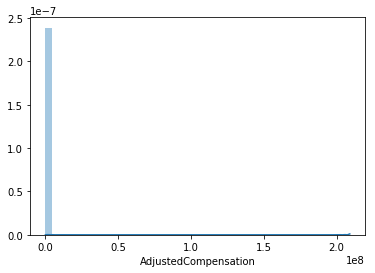

In [18]:
doc_salary = doc_salary.loc[(stats.zscore(doc_salary.values)) < 3]
sns.distplot(doc_salary)

In [19]:
t4, p4 = ttest_ind(bach_salary, doc_salary, equal_var=False)
print(f" ttest_ind: t = {t4},  p = {p4/2}")

 ttest_ind: t = -1.1522479897299747,  p = 0.12475225531522234


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [20]:
data['AdjustedCompensation'] = data['AdjustedCompensation'].astype('float64')

In [21]:
#Your code here
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, data).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!